<font size=7> Instant Firing Rate

### Set Up Notebook

Here we play around with the instant firing rate function. Instant firing rate is one of Tal Sharf's ideas. It's purpose is to have some quasie continous function representing the firing rate of a neuron. 

In [62]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import cm

from human_hip.spike_data import instant_firing_rate, raster_fancy_plot

Let's see what the instantanous firing rate look like for a specific neuron of a dataset. Here use a neuron from the ?posterior? CA1 slice (hc3.28). This is the dataset that we've spent the most time analyzing.


In [2]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb' )
sd = pickle.load(file)
file.close()

In [63]:
raster_fancy_plot

<function human_hip.spike_data.raster_plots.raster_fancy_plot(sd, xsize=10, ysize=6, start_time=0, stop_time=None, save_path=None)>

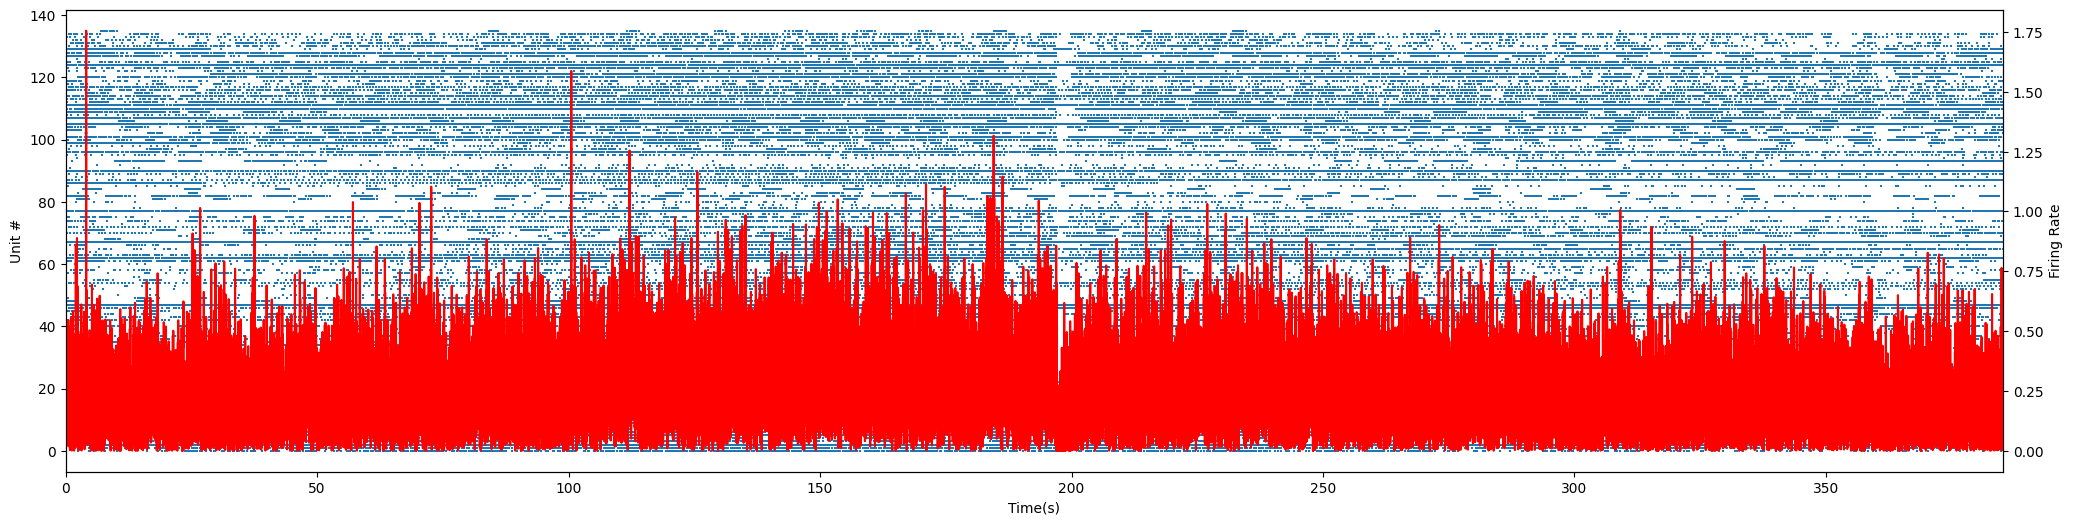

In [65]:
raster_fancy_plot( sd, xsize=25, ysize=6  )

### Basic Plots

Lets see a graph of the instant firing rate for a few different neurons

In [3]:
instant_firing_rate

<function human_hip.spike_data.instant_firing_rate.instant_firing_rate(sd, neuron_num, max_ifr=90000000000.0)>

(150000.0, 200000.0)

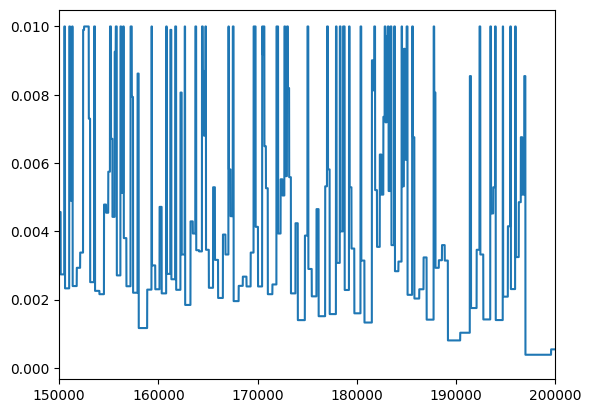

In [20]:
neuron_ifr = instant_firing_rate(sd, 0 , max_ifr=.01)
plt.plot(neuron_ifr)
plt.xlim( 150000, 200000)

(150000.0, 200000.0)

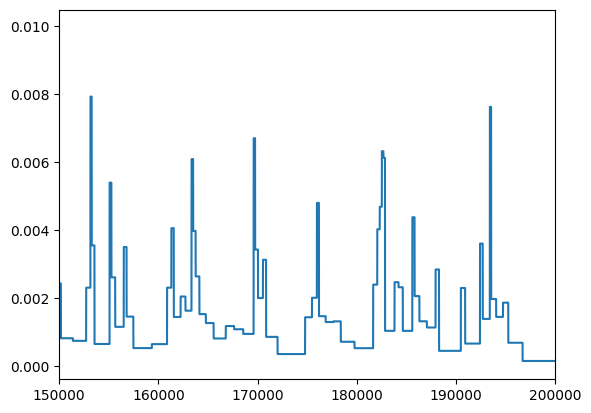

In [19]:
neuron_ifr = instant_firing_rate(sd, 10 , max_ifr=.01)
plt.plot(neuron_ifr)
plt.xlim( 150000, 200000)

(150000.0, 200000.0)

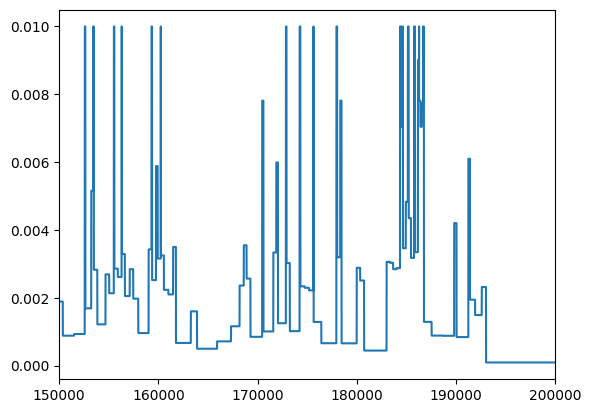

In [18]:
neuron_ifr = instant_firing_rate(sd, 50 , max_ifr=.01)
plt.plot(neuron_ifr)
plt.xlim( 150000, 200000)

### Animations

Here we make a an animation of the instant firing rate for every single neuron. First we calculate the IFR for every neuron


In [27]:
all_ifr = []           # Array of all neurons' IFRs
for i in range(sd.N):  # Loop through all neurons
    neuron_ifr = instant_firing_rate(sd, i , max_ifr=.01) # Calculate IFR
    all_ifr.append(neuron_ifr)

make all IFR lists the same length so that we can create an animation. This is done by appending zero to the each array.

In [42]:
max_len = max([ len(ifr) for ifr in all_ifr  ])  # find list with maximum length
same_len_ifr = []
for ifr in all_ifr:
    same_len_ifr.append( ifr + [0]*(max_len-len(ifr)) ) # pad with zeros
all_ifr = np.array(same_len_ifr) # convert to numpy array

Get neurons positions

In [21]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

/tmp/ipykernel_23688/3713121702.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


Create animation

recording length (seconds):  40.0


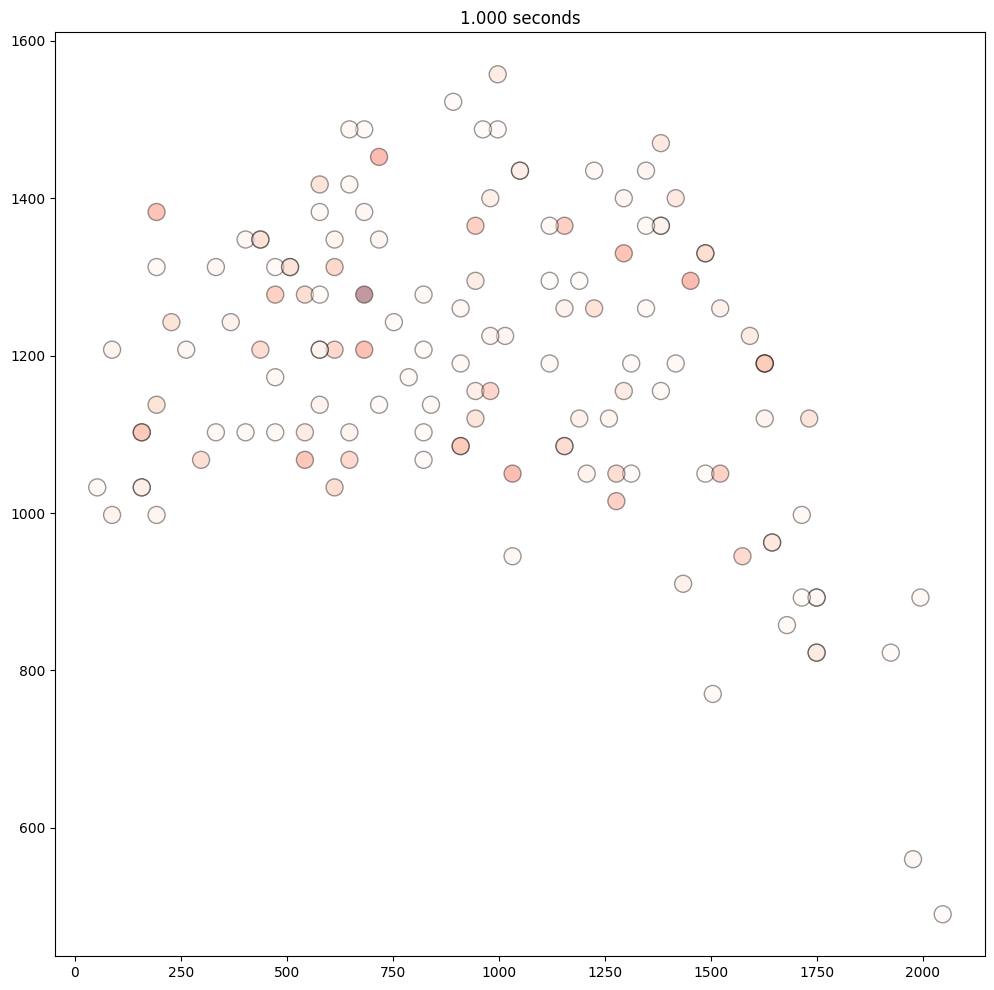

In [68]:
### Long Alpha Animation
fig = plt.figure( figsize=(12,12) )           # Determine the size of the figure
ax = plt.axes()                               # get axis element to later create plot
norm = plt.Normalize( vmin= 0, vmax= .01 ) # norm determines color range for data, set according to max_ifr value
# Create scatter plot, 
scatter = ax.scatter( neuron_y, neuron_x, c=all_ifr[:,0] , norm=norm, cmap=cm.Reds,  s=[150]*sd.N,  alpha=.4,  edgecolor='black' ) 

# animation function: The i in this function relate to the range in FuncAnimation, shown below
def animate( i ):
    scatter.set_array(all_ifr[:,i])   # This changes the value of `c` the color
    ax.set_title(f"{i/1000:.3f} seconds") # We display the current time
    return scatter


anim_range = range(1000, 5000, 10)  # specify the start time (ms), stop time (ms), and step size (ms)
print( "recording length (seconds): ", len(anim_range)*100/1000 )
anim = FuncAnimation(fig, animate, frames=anim_range, interval=100, blit=False)  # Create animation object
 

In [66]:
anim.save("media/ifr_test.mp4")